In [1]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords

In [2]:
df=pd.read_csv('clean_abstract_bush.csv')

In [3]:
df

,abstract,date
0,peter marks analysis finds that commercials ru...,2000-01-01 05:00:00+00:00
1,the new york times the internet and political ...,2000-01-01 05:00:00+00:00
2,letter by mike fremont of rivers unlimited on ...,2000-01-02 05:00:00+00:00
3,presidential primary season is the most compet...,2000-01-02 05:00:00+00:00
4,editorial on various campaign proposals for us...,2000-01-02 05:00:00+00:00
...,...,...
40816,republicans have criticized her tweets but dem...,2021-02-25 20:56:39+00:00
40817,the disputes are reminiscent of the fight surr...,2021-02-26 00:12:38+00:00
40818,most presidents leave the white house and adop...,2021-02-27 17:00:07+00:00
40819,democracy an unassuming policy journal with an...,2021-02-28 22:02:50+00:00


#### Stopword list

In [4]:
stopword_list=stopwords.words('english')

In [5]:
stopword_list.extend(['could','many','even','also','make','whether','least','called','keep','said','says', 'say',
                      'george','bush',' w ','bushs','mr','pres','would','president','sen','us','united', 'states','american','americans',
                       'white','house','new','york','way','people','year','years','sec','state','photo'])

In [6]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
df['abstract']=df['abstract'].astype(str)

In [8]:
df['date']=pd.to_datetime(df['date'])

#### Replace words with 'root'

In [9]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('iraqis','iraq'))

In [10]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('iraqi','iraq'))

In [11]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('democrats','democrat'))

In [12]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('republicans','republican'))

In [13]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('israeli','israel'))

In [14]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('al gore', 'gore'))

#### Count Vectorize

In [15]:
vectorizer = CountVectorizer(stop_words=stopword_list, ngram_range=(1, 1))

In [16]:
doc_word = vectorizer.fit_transform(df['abstract'].values.astype('U'))

In [17]:
doc_word.shape

(40821, 43546)

#### NMF model 4 topics

In [18]:
nmf_model = NMF(4, max_iter=300)
doc_topic = nmf_model.fit_transform(doc_word)

In [19]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [20]:
display_topics(nmf_model, vectorizer.get_feature_names(), 25)


Topic  0
iraq, war, government, security, military, troops, forces, hussein, saddam, world, weapons, baghdad, country, help, time, leaders, enemy, support, al, one, terrorists, attacks, know, strategy, iraqs

Topic  1
republican, democrat, presidential, campaign, john, senate, democratic, gov, party, election, gore, bill, political, court, vote, vice, mccain, voters, florida, national, candidates, votes, kerry, one, committee

Topic  2
administration, officials, israel, nuclear, north, military, palestinian, government, nations, security, korea, national, federal, washington, weapons, intelligence, attacks, policy, two, international, program, plan, prime, administrations, first

Topic  3
tax, billion, cuts, budget, spending, percent, congress, plan, federal, cut, bill, security, kerry, social, money, taxes, health, senate, million, next, economic, programs, deficit, government, increase


In [21]:
doc_topic = pd.DataFrame(doc_topic.round(3),
             columns = ["component_1","component_2","component_3", "component_4"])
doc_topic



,component_1,component_2,component_3,component_4
0,0.002,0.058,0.003,0.000
1,0.002,0.014,0.003,0.000
2,0.002,0.000,0.012,0.004
3,0.001,0.041,0.005,0.000
4,0.000,0.000,0.000,0.283
...,...,...,...,...
40816,0.000,0.097,0.000,0.000
40817,0.002,0.004,0.019,0.000
40818,0.001,0.017,0.016,0.001
40819,0.000,0.000,0.098,0.000


#### Break down dataframe by year count

In [22]:
df.loc[:,'year']=df['date'].apply(lambda x: x.year)

In [23]:
df

,abstract,date,year
0,peter marks analysis finds that commercials ru...,2000-01-01 05:00:00+00:00,2000
1,the new york times the internet and political ...,2000-01-01 05:00:00+00:00,2000
2,letter by mike fremont of rivers unlimited on ...,2000-01-02 05:00:00+00:00,2000
3,presidential primary season is the most compet...,2000-01-02 05:00:00+00:00,2000
4,editorial on various campaign proposals for us...,2000-01-02 05:00:00+00:00,2000
...,...,...,...
40816,republican have criticized her tweets but demo...,2021-02-25 20:56:39+00:00,2021
40817,the disputes are reminiscent of the fight surr...,2021-02-26 00:12:38+00:00,2021
40818,most presidents leave the white house and adop...,2021-02-27 17:00:07+00:00,2021
40819,democracy an unassuming policy journal with an...,2021-02-28 22:02:50+00:00,2021


#### Make Graph of average of all components by year 

In [24]:
doc_topic_year=pd.concat([doc_topic, df['year']],axis=1)

In [25]:
doc_topic_year

,component_1,component_2,component_3,component_4,year
0,0.002,0.058,0.003,0.000,2000
1,0.002,0.014,0.003,0.000,2000
2,0.002,0.000,0.012,0.004,2000
3,0.001,0.041,0.005,0.000,2000
4,0.000,0.000,0.000,0.283,2000
...,...,...,...,...,...
40816,0.000,0.097,0.000,0.000,2021
40817,0.002,0.004,0.019,0.000,2021
40818,0.001,0.017,0.016,0.001,2021
40819,0.000,0.000,0.098,0.000,2021


In [26]:
df_avg=doc_topic_year.groupby('year')[['component_1','component_2','component_3','component_4']].mean().reset_index()

In [27]:
df_avg

,year,component_1,component_2,component_3,component_4
0,2000,0.002446,0.099097,0.019311,0.015208
1,2001,0.008651,0.033005,0.068968,0.039718
2,2002,0.023712,0.033678,0.082303,0.029750
3,2003,0.050759,0.028649,0.071094,0.040105
4,2004,0.033188,0.051065,0.056079,0.034527
5,2005,0.021325,0.031961,0.053600,0.035624
6,2006,0.028818,0.026660,0.040059,0.019780
7,2007,0.019912,0.013431,0.021484,0.010223
8,2008,0.009791,0.015561,0.023254,0.010554
9,2009,0.004240,0.012036,0.020023,0.008591


In [28]:
df_avg['year']

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
20    2020
21    2021
Name: year, dtype: int64

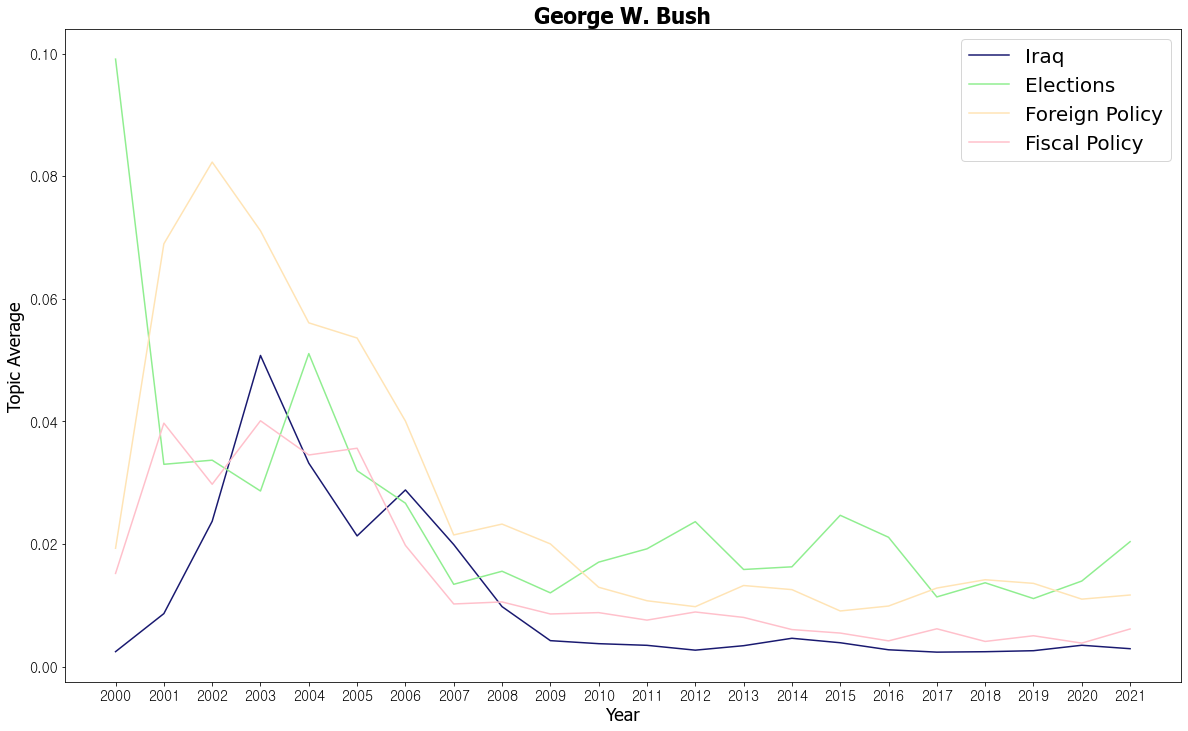

In [35]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_avg['year'],df_avg['component_1'],color='midnightblue', label="Iraq");
ax.plot(df_avg['year'],df_avg['component_2'],color='lightgreen', label='Elections');
ax.plot(df_avg['year'],df_avg['component_3'],color='moccasin', label='Foreign Policy');
ax.plot(df_avg['year'],df_avg['component_4'],color='pink',label='Fiscal Policy');
plt.xlabel("Year", **tfont)
plt.ylabel("Topic Average", **tfont)
plt.title('George W. Bush', **tbfont)
plt.xticks(df_avg['year'])
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.legend(prop={'size': 20})
plt.savefig('topic_bush_avg.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();

#### Make graph of counts 

In [233]:
df_count=df.groupby('year')['year'].count().to_frame(name='count').reset_index()

In [234]:
df_count

,year,count
0,2000,3023
1,2001,3032
2,2002,3024
3,2003,3041
4,2004,3024
5,2005,3030
6,2006,3036
7,2007,3025
8,2008,3029
9,2009,2984


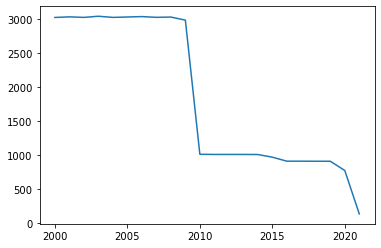

In [235]:
plt.plot(df_count['year'],df_count['count'])

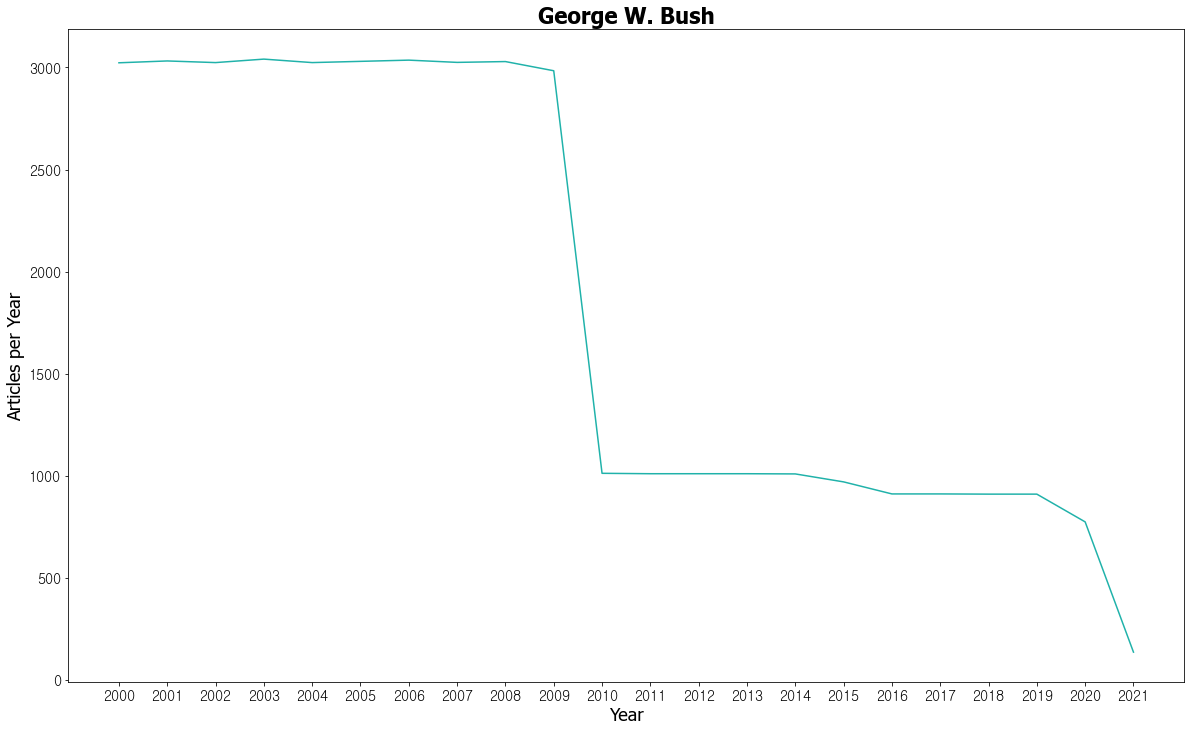

In [236]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_count['year'],df_count['count'],color='lightseagreen');
plt.xlabel("Year", **tfont)
plt.ylabel("Articles per Year", **tfont)
plt.title('George W. Bush', **tbfont)
plt.xticks(df_count['year'])
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.savefig('articles_count_bush.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();


#### Break down dataframe by year to apply topic

In [237]:
dict_of_df={}
for x in range(2000,2022):
    dict_of_df["df_{}".format(x)]=df[df['year']==x]

In [238]:
dict_of_df["df_2000"]['abstract']

0       peter marks analysis finds that commercials ru...
1       the new york times the internet and political ...
2       letter by mike fremont of rivers unlimited on ...
3       presidential primary season is the most compet...
4       editorial on various campaign proposals for us...
                              ...                        
3018    maureen dowd oped column in form of tongueinch...
3019    oped article by fareed zakaria says globalizat...
3020    protracted votecounting for  election delays p...
3021    vice preselect dick cheney who is heading bush...
3022    editorial says two reports commissioned by sec...
Name: abstract, Length: 3023, dtype: object

In [239]:
doc_word_2000 = vectorizer.transform(dict_of_df["df_2000"]['abstract'].values.astype('U'))

In [240]:
doc_word_2000.shape

(3023, 43546)

In [241]:
doc_topic_2000 = nmf_model.transform(doc_word_2000)

In [242]:
doc_topic_2000 = pd.DataFrame(doc_topic_2000.round(3),
             columns = ["component_1","component_2","component_3", "component_4"])
doc_topic_2000


,component_1,component_2,component_3,component_4
0,0.002,0.058,0.003,0.000
1,0.002,0.014,0.003,0.000
2,0.002,0.000,0.012,0.004
3,0.001,0.041,0.005,0.000
4,0.000,0.000,0.000,0.283
...,...,...,...,...
3018,0.003,0.004,0.010,0.005
3019,0.016,0.032,0.074,0.011
3020,0.002,0.034,0.018,0.005
3021,0.000,0.028,0.174,0.000


In [243]:
doc_topic_2000['doctopic']=doc_topic_2000.idxmax(axis=1)

In [244]:
topic_freq_2000=doc_topic_2000.groupby('doctopic')['doctopic'].count().to_frame(name='count').reset_index()

In [245]:
topic_freq_2000

,doctopic,count
0,component_1,20
1,component_2,2487
2,component_3,321
3,component_4,195


In [246]:
topic_freq_2000['count'].sum()

3023

In [247]:
topic_freq_2000['freq']=topic_freq_2000['count']/topic_freq_2000['count'].sum()

In [248]:
topic_freq_2000

,doctopic,count,freq
0,component_1,20,0.006616
1,component_2,2487,0.822693
2,component_3,321,0.106186
3,component_4,195,0.064505


In [249]:
topic_freq_2000['year']=2000

In [250]:
topic_freq_2000

,doctopic,count,freq,year
0,component_1,20,0.006616,2000
1,component_2,2487,0.822693,2000
2,component_3,321,0.106186,2000
3,component_4,195,0.064505,2000


In [251]:
dict_df_topic_freq={}
for x in range(2000,2022):
    df=vectorizer.transform(dict_of_df["df_{}".format(x)]['abstract'].values.astype('U'))
    doc_topic = nmf_model.transform(df)
    doc_topic = pd.DataFrame(doc_topic.round(3),
             columns = ["component_1","component_2","component_3", "component_4"])
    doc_topic['doctopic']=doc_topic.idxmax(axis=1)
    topic_freq=doc_topic.groupby('doctopic')['doctopic'].count().to_frame(name='count').reset_index()
    topic_freq['freq']=topic_freq['count']/topic_freq['count'].sum()
    topic_freq['year']=x
    dict_df_topic_freq["df_{}".format(x)]=topic_freq

In [252]:
dict_df_topic_freq['df_2000']

,doctopic,count,freq,year
0,component_1,20,0.006616,2000
1,component_2,2487,0.822693,2000
2,component_3,321,0.106186,2000
3,component_4,195,0.064505,2000


In [253]:
df_tf=dict_df_topic_freq['df_2000']

In [254]:
for x in range(2001,2022):
    df_tf=df_tf.append(dict_df_topic_freq['df_{}'.format(x)], ignore_index=True)

In [255]:
df_tf.sort_values(by=['doctopic','year'], inplace=True)

In [256]:
df_topic_1=df_tf[df_tf["doctopic"]=='component_1']
df_topic_1

,doctopic,count,freq,year
0,component_1,20,0.006616,2000
4,component_1,112,0.036939,2001
8,component_1,305,0.100860,2002
12,component_1,803,0.264058,2003
16,component_1,452,0.149471,2004
20,component_1,752,0.248185,2005
24,component_1,809,0.266469,2006
28,component_1,856,0.282975,2007
32,component_1,424,0.139980,2008
36,component_1,226,0.075737,2009


In [257]:
df_topic_2=df_tf[df_tf["doctopic"]=='component_2']
df_topic_2

,doctopic,count,freq,year
1,component_2,2487,0.822693,2000
5,component_2,618,0.203826,2001
9,component_2,531,0.175595,2002
13,component_2,448,0.147320,2003
17,component_2,1071,0.354167,2004
21,component_2,586,0.193399,2005
25,component_2,632,0.208169,2006
29,component_2,538,0.177851,2007
33,component_2,731,0.241334,2008
37,component_2,765,0.256367,2009


In [258]:
df_topic_3=df_tf[df_tf["doctopic"]=='component_3']
df_topic_3

,doctopic,count,freq,year
2,component_3,321,0.106186,2000
6,component_3,1718,0.566623,2001
10,component_3,1753,0.579696,2002
14,component_3,1281,0.421243,2003
18,component_3,1065,0.352183,2004
22,component_3,1181,0.389769,2005
26,component_3,1248,0.411067,2006
30,component_3,1256,0.415207,2007
34,component_3,1434,0.473424,2008
38,component_3,1540,0.516086,2009


In [259]:
df_topic_4=df_tf[df_tf["doctopic"]=='component_4']
df_topic_4

,doctopic,count,freq,year
3,component_4,195,0.064505,2000
7,component_4,584,0.192612,2001
11,component_4,435,0.143849,2002
15,component_4,509,0.167379,2003
19,component_4,436,0.144180,2004
23,component_4,511,0.168647,2005
27,component_4,347,0.114295,2006
31,component_4,375,0.123967,2007
35,component_4,440,0.145262,2008
39,component_4,453,0.151810,2009


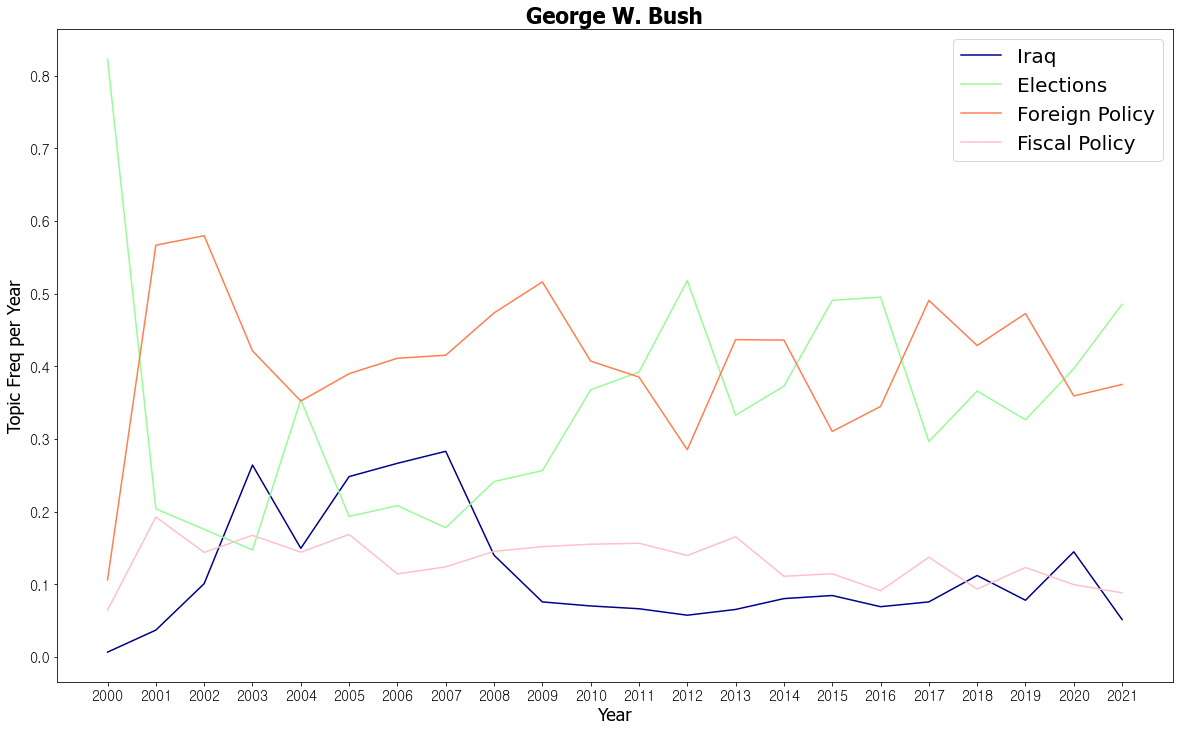

In [271]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_topic_1['year'],df_topic_1['freq'],color='darkblue', label="Iraq");
ax.plot(df_topic_2['year'],df_topic_2['freq'],color='palegreen', label='Elections');
ax.plot(df_topic_3['year'],df_topic_3['freq'],color='coral', label='Foreign Policy');
ax.plot(df_topic_4['year'],df_topic_4['freq'],color='pink',label='Fiscal Policy');
plt.xlabel("Year", **tfont)
plt.ylabel("Topic Freq per Year", **tfont)
plt.title('George W. Bush', **tbfont)
plt.xticks(df_count['year'])
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.legend(prop={'size': 20})
plt.savefig('topic_bush.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();


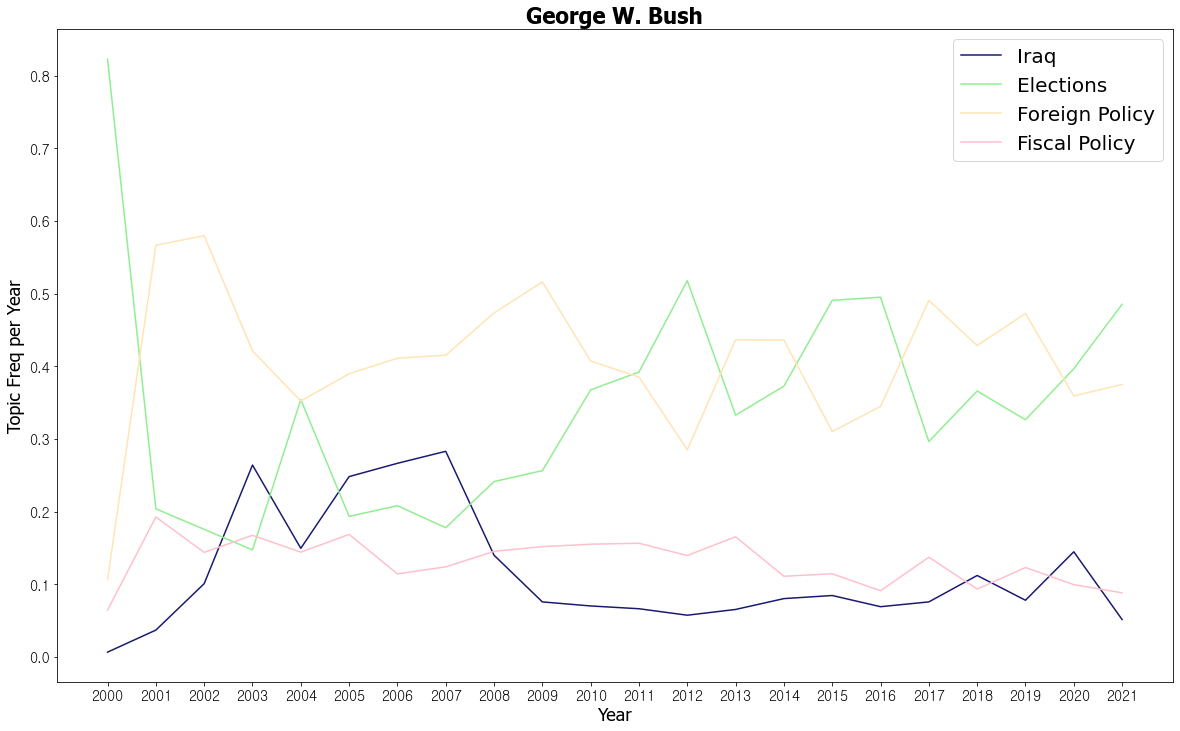

In [281]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_topic_1['year'],df_topic_1['freq'],color='midnightblue', label="Iraq");
ax.plot(df_topic_2['year'],df_topic_2['freq'],color='lightgreen', label='Elections');
ax.plot(df_topic_3['year'],df_topic_3['freq'],color='moccasin', label='Foreign Policy');
ax.plot(df_topic_4['year'],df_topic_4['freq'],color='pink',label='Fiscal Policy');
plt.xlabel("Year", **tfont)
plt.ylabel("Topic Freq per Year", **tfont)
plt.title('George W. Bush', **tbfont)
plt.xticks(df_count['year'])
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.legend(prop={'size': 20})
plt.savefig('topic_bush_2.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();
